In [3]:
import nfl_data_py as nfl
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy

In [4]:
draftData = nfl.import_draft_picks()

In [5]:
draftData = draftData[draftData["season"] >= 2000]

In [6]:
draftData.head()


,season,round,pick,team,gsis_id,pfr_player_id,cfb_player_id,pfr_player_name,hof,position,...,pass_ints,rush_atts,rush_yards,rush_tds,receptions,rec_yards,rec_tds,def_solo_tackles,def_ints,def_sacks
6026,2000,1,1,CLE,None,BrowCo22,courtney-brown-1,Courtney Brown,False,DE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,156.0,NaN,19.0
6027,2000,1,2,WAS,None,ArriLa00,lavar-arrington-1,LaVar Arrington,False,LB,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,338.0,3.0,23.5
6028,2000,1,3,WAS,None,SamuCh00,chris-samuels-2,Chris Samuels,False,T,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
6029,2000,1,4,CIN,None,WarrPe00,peter-warrick-1,Peter Warrick,False,WR,...,0.0,53.0,360.0,2.0,275.0,2991.0,18.0,3.0,NaN,NaN
6030,2000,1,5,BAL,None,LewiJa00,jamal-lewis-2,Jamal Lewis,False,RB,...,0.0,2542.0,10607.0,58.0,221.0,1879.0,4.0,NaN,NaN,NaN


In [7]:
playerData = nfl.import_players()

In [8]:
playerData.head()

,status,display_name,first_name,last_name,esb_id,gsis_id,birth_date,college_name,position_group,position,...,college_conference,status_description_abbr,status_short_description,gsis_it_id,short_name,smart_id,headshot,suffix,uniform_number,draft_round
0,RET,'Omar Ellison,'Omar,Ellison,ELL711319,00-0004866,1971-10-08,None,WR,WR,...,None,None,None,NaN,None,3200454c-4c71-1319-728e-d49d3d236f8f,None,None,None,None
1,ACT,A'Shawn Robinson,A'Shawn,Robinson,ROB367960,00-0032889,1995-03-21,Alabama,DL,DT,...,Southeastern Conference,A01,Active,43335.0,A.Robinson,3200524f-4236-7960-bf20-bc060ac0f49c,https://static.www.nfl.com/image/private/f_aut...,None,94,None
2,DEV,A.J. Arcuri,A.J.,Arcuri,ARC716900,00-0037845,1997-08-13,Michigan State,OL,T,...,Big Ten Conference,P01,Practice Squad,54726.0,A.Arcuri,32004152-4371-6900-5185-8cdd66b2ad11,None,None,61,None
3,ACT,A.J. Barner,A.J.,Barner,BAR235889,00-0039793,2002-05-03,Michigan,TE,TE,...,Big Ten Conference,A01,Active,57242.0,A.Barner,32004241-5223-5889-95d9-0ba3aeeb36ed,https://static.www.nfl.com/image/upload/f_auto...,None,88,None
4,RES,A.J. Bouye,Arlandus,Bouye,BOU651714,00-0030228,1991-08-16,Central Florida,DB,CB,...,American Athletic Conference,R01,R/Injured,40688.0,A.Bouye,3200424f-5565-1714-cb38-07c822111a12,https://static.www.nfl.com/image/private/f_aut...,None,24,None


In [9]:
with open("data/player_stats.csv") as f:
    playerStats = pd.read_csv(f)
playerStats.head()

,player_id,player_name,player_display_name,position,position_group,headshot_url,recent_team,season,week,season_type,...,receiving_first_downs,receiving_epa,receiving_2pt_conversions,racr,target_share,air_yards_share,wopr,special_teams_tds,fantasy_points,fantasy_points_ppr
0,00-0000003,NaN,Abdul-Karim al-Jabbar,RB,RB,NaN,MIA,1999,1,REG,...,0,0.292378,0,0.0,0.052632,NaN,NaN,0,12.7,13.7
1,00-0000003,NaN,Abdul-Karim al-Jabbar,RB,RB,NaN,MIA,1999,2,REG,...,1,0.377009,0,0.0,0.117647,NaN,NaN,0,5.1,8.1
2,00-0000003,NaN,Abdul-Karim al-Jabbar,RB,RB,NaN,MIA,1999,4,REG,...,0,-0.699578,0,NaN,0.023810,NaN,NaN,0,0.2,0.2
3,00-0000003,NaN,Abdul-Karim al-Jabbar,RB,RB,NaN,CLE,1999,7,REG,...,0,-0.228454,0,0.0,0.050000,NaN,NaN,0,3.5,5.5
4,00-0000003,NaN,Abdul-Karim al-Jabbar,RB,RB,NaN,CLE,1999,8,REG,...,0,NaN,0,NaN,NaN,NaN,NaN,0,3.9,3.9


In [10]:
playerStats.columns

Index(['player_id', 'player_name', 'player_display_name', 'position',
       'position_group', 'headshot_url', 'recent_team', 'season', 'week',
       'season_type', 'opponent_team', 'completions', 'attempts',
       'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards',
       'sack_fumbles', 'sack_fumbles_lost', 'passing_air_yards',
       'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
       'passing_2pt_conversions', 'pacr', 'dakota', 'carries', 'rushing_yards',
       'rushing_tds', 'rushing_fumbles', 'rushing_fumbles_lost',
       'rushing_first_downs', 'rushing_epa', 'rushing_2pt_conversions',
       'receptions', 'targets', 'receiving_yards', 'receiving_tds',
       'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_air_yards',
       'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa',
       'receiving_2pt_conversions', 'racr', 'target_share', 'air_yards_share',
       'wopr', 'special_teams_tds', 'fantasy_points

In [11]:
qbStats = playerStats[playerStats["position"] == "QB"]
qbStats.head()

,player_id,player_name,player_display_name,position,position_group,headshot_url,recent_team,season,week,season_type,...,receiving_first_downs,receiving_epa,receiving_2pt_conversions,racr,target_share,air_yards_share,wopr,special_teams_tds,fantasy_points,fantasy_points_ppr
17,00-0000104,NaN,Troy Aikman,QB,QB,NaN,DAL,1999,1,REG,...,0,NaN,0,NaN,NaN,NaN,NaN,0,28.60,28.60
18,00-0000104,NaN,Troy Aikman,QB,QB,NaN,DAL,1999,2,REG,...,0,NaN,0,NaN,NaN,NaN,NaN,0,0.24,0.24
19,00-0000104,NaN,Troy Aikman,QB,QB,NaN,DAL,1999,4,REG,...,0,NaN,0,NaN,NaN,NaN,NaN,0,15.54,15.54
20,00-0000104,NaN,Troy Aikman,QB,QB,NaN,DAL,1999,5,REG,...,0,NaN,0,NaN,NaN,NaN,NaN,0,6.98,6.98
21,00-0000104,NaN,Troy Aikman,QB,QB,NaN,DAL,1999,6,REG,...,0,NaN,0,NaN,NaN,NaN,NaN,0,8.40,8.40


In [12]:
qbStatsCareer = qbStats.groupby(["player_display_name"])
qbStatsCareer = qbStatsCareer.agg("sum", numeric_only=True)
qbStatsCareer = qbStatsCareer.reset_index()
qbStatsCareer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_display_name          391 non-null    object 
 1   season                       391 non-null    int64  
 2   week                         391 non-null    int64  
 3   completions                  391 non-null    int64  
 4   attempts                     391 non-null    int64  
 5   passing_yards                391 non-null    int64  
 6   passing_tds                  391 non-null    int64  
 7   interceptions                391 non-null    int64  
 8   sacks                        391 non-null    int64  
 9   sack_yards                   391 non-null    int64  
 10  sack_fumbles                 391 non-null    int64  
 11  sack_fumbles_lost            391 non-null    int64  
 12  passing_air_yards            391 non-null    int64  
 13  passing_yards_after_

In [13]:
def definePasserRating(att,comp,yds,td,ints): # computes the passer rating of a player
    try:
        a = ((comp / att) - 0.3) * 5
        b = (yds / att - 3) * 0.25
        c = (td / att) * 20
        d = 2.375 - ((ints / att) * 25 )
        vals = [a,b,c,d]
        for index,x in enumerate(vals):
            if x > 2.375:
                vals[index] = 2.375
            elif x < 0:
                vals[index] = 0

        rating = sum(vals) * 100 / 6
        
        return rating

    except Exception as e:
        return 0
    
def passerRatingByRow(row:pd.Series):
    rating = definePasserRating(row["attempts"],row["completions"],row["passing_yards"],row["passing_tds"],row["interceptions"])
    return round(rating,2)


In [14]:
qbStatsCareer["careerPasserRating"] = qbStatsCareer.apply(passerRatingByRow, axis=1)

<Axes: xlabel='attempts', ylabel='careerPasserRating'>

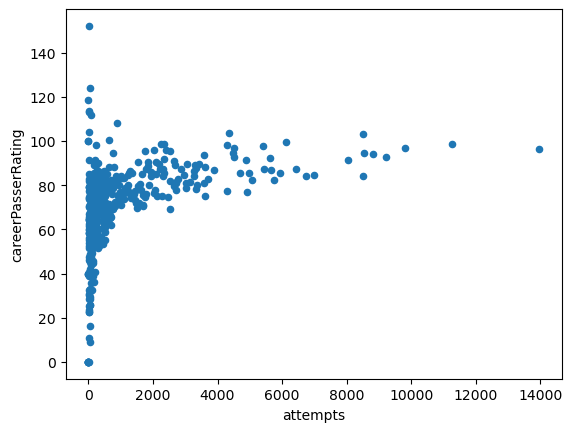

In [15]:
qbStatsCareer.plot(x="attempts",y="careerPasserRating", kind="scatter")

# Draft

In [16]:
draftData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6387 entries, 6026 to 12412
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            6387 non-null   int32  
 1   round             6387 non-null   int32  
 2   pick              6387 non-null   int32  
 3   team              6387 non-null   object 
 4   gsis_id           2644 non-null   object 
 5   pfr_player_id     6131 non-null   object 
 6   cfb_player_id     5336 non-null   object 
 7   pfr_player_name   6387 non-null   object 
 8   hof               6387 non-null   bool   
 9   position          6387 non-null   object 
 10  category          6387 non-null   object 
 11  side              6384 non-null   object 
 12  college           6387 non-null   object 
 13  age               6121 non-null   float64
 14  to                5719 non-null   float64
 15  allpro            6387 non-null   int32  
 16  probowls          6387 non-null   int3

In [17]:
draftData[["pfr_player_id", "pfr_player_name"]]

,pfr_player_id,pfr_player_name
6026,BrowCo22,Courtney Brown
6027,ArriLa00,LaVar Arrington
6028,SamuCh00,Chris Samuels
6029,WarrPe00,Peter Warrick
6030,LewiJa00,Jamal Lewis
...,...,...
12408,JohnCo02,Cornelius Johnson
12409,LeveKT00,KT Leveston
12410,KingKa00,Kalen King
12411,GargNi00,Nick Gargiulo


In [18]:
playerStatsCareer = playerStats.groupby(["player_display_name"])
playerStatsCareer = playerStatsCareer.agg("sum", numeric_only=True)
playerStatsCareer = playerStatsCareer.reset_index()
playerStatsCareer

,player_display_name,season,week,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_yards,...,receiving_first_downs,receiving_epa,receiving_2pt_conversions,racr,target_share,air_yards_share,wopr,special_teams_tds,fantasy_points,fantasy_points_ppr
0,A.J. Barner,2024,3,0,0,0,0,0,0,0,...,2,0.111433,0,6.500000,0.090909,0.010363,0.143618,0,1.3,4.3
1,A.J. Brown,173810,883,0,2,0,0,0,0,0,...,293,294.683184,0,73.402054,22.997676,32.958048,57.567148,1,936.0,1349.0
2,A.J. Cole,2020,15,0,0,0,0,0,0,0,...,0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.0,0.0
3,A.J. Derby,40337,171,0,0,0,0,0,0,0,...,21,-1.568690,0,18.493713,1.865119,1.884957,4.117148,0,59.2,99.2
4,A.J. Dillon,123317,582,0,0,0,0,0,0,0,...,36,19.515982,0,-109.681044,3.339725,0.124827,5.096966,0,439.3,526.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4010,Zeron Flemister,60051,321,0,0,0,0,0,0,0,...,27,13.143750,0,0.000000,2.627881,0.000000,0.000000,0,65.9,103.9
4011,Zola Davis,7996,57,0,0,0,0,0,0,0,...,2,0.758071,0,0.000000,0.233126,0.000000,0.000000,0,3.8,5.8
4012,Zonovan Knight,18200,113,0,0,0,0,0,0,0,...,5,4.616411,0,-32.766667,0.380544,-0.103112,0.498637,0,48.1,62.1
4013,Zuriel Smith,4006,25,0,0,0,0,0,0,0,...,1,1.089694,0,0.000000,0.166667,0.000000,0.000000,0,4.6,7.6


In [19]:
mergedData = draftData.merge(playerStatsCareer,how="left",left_on="pfr_player_name",right_on="player_display_name")
mergedData.columns

Index(['season_x', 'round', 'pick', 'team', 'gsis_id', 'pfr_player_id',
       'cfb_player_id', 'pfr_player_name', 'hof', 'position', 'category',
       'side', 'college', 'age', 'to', 'allpro', 'probowls', 'seasons_started',
       'w_av', 'car_av', 'dr_av', 'games', 'pass_completions', 'pass_attempts',
       'pass_yards', 'pass_tds', 'pass_ints', 'rush_atts', 'rush_yards',
       'rush_tds', 'receptions_x', 'rec_yards', 'rec_tds', 'def_solo_tackles',
       'def_ints', 'def_sacks', 'player_display_name', 'season_y', 'week',
       'completions', 'attempts', 'passing_yards', 'passing_tds',
       'interceptions', 'sacks', 'sack_yards', 'sack_fumbles',
       'sack_fumbles_lost', 'passing_air_yards', 'passing_yards_after_catch',
       'passing_first_downs', 'passing_epa', 'passing_2pt_conversions', 'pacr',
       'dakota', 'carries', 'rushing_yards', 'rushing_tds', 'rushing_fumbles',
       'rushing_fumbles_lost', 'rushing_first_downs', 'rushing_epa',
       'rushing_2pt_conversions'

In [20]:
qbCareer = mergedData[mergedData["position"] == "QB"]
qbCareer

,season_x,round,pick,team,gsis_id,pfr_player_id,cfb_player_id,pfr_player_name,hof,position,...,receiving_first_downs,receiving_epa,receiving_2pt_conversions,racr,target_share,air_yards_share,wopr,special_teams_tds,fantasy_points,fantasy_points_ppr
17,2000,1,18,NYJ,None,PennCh01,chad-pennington-1,Chad Pennington,False,QB,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,1127.98,1127.98
64,2000,3,65,SFO,None,None,None,Giovanni Carmazzi,False,QB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,2000,3,75,BAL,00-0019709,RedmCh00,chris-redman-1,Chris Redman,False,QB,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,175.46,175.46
162,2000,5,163,PIT,None,MartTe00,tee-martin-1,Tee Martin,False,QB,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,2.36,2.36
167,2000,6,168,NOR,None,BulgMa00,marc-bulger-1,Marc Bulger,False,QB,...,0.0,0.557678,0.0,2.0,0.149646,0.105992,0.220623,0.0,1295.20,1299.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6279,2024,5,150,NOR,None,RattSp00,spencer-rattler-1,Spencer Rattler,False,QB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6300,2024,5,171,NYJ,None,TravJo00,jordan-travis-1,Jordan Travis,False,QB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6322,2024,6,193,NWE,None,MiltJo00,joe-milton-2,Joe Milton,False,QB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6347,2024,6,218,BAL,None,LearDe00,devin-leary-1,Devin Leary,False,QB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/var/folders/5c/_dwtkx1d5j7835qsxngq7bxm0000gn/T/ipykernel_66951/2299545211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qbCareer["careerPasserRating"] = qbCareer.apply(passerRatingByRow, axis=1)


<Axes: xlabel='careerPasserRating', ylabel='pick'>

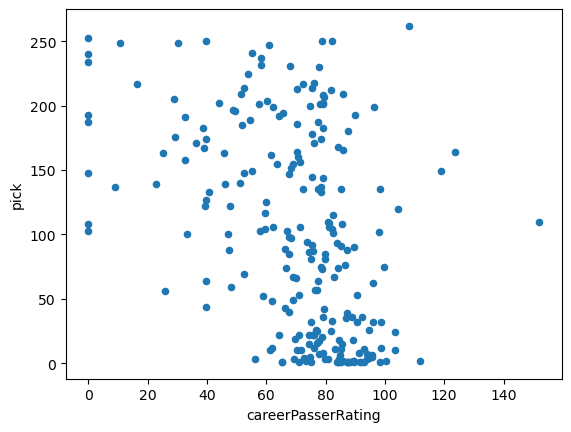

In [21]:
qbCareer["careerPasserRating"] = qbCareer.apply(passerRatingByRow, axis=1)
x = qbCareer[qbCareer["round"] == 1]
qbCareer.plot(y="pick",x="careerPasserRating",kind="scatter")

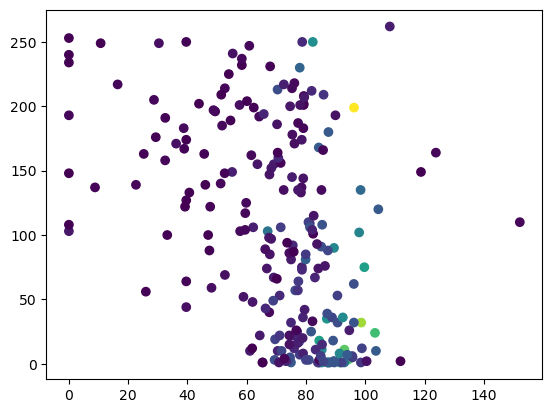

In [22]:
fig, ax = plt.subplots()
ax.scatter("careerPasserRating","pick",c="games",data=qbCareer)

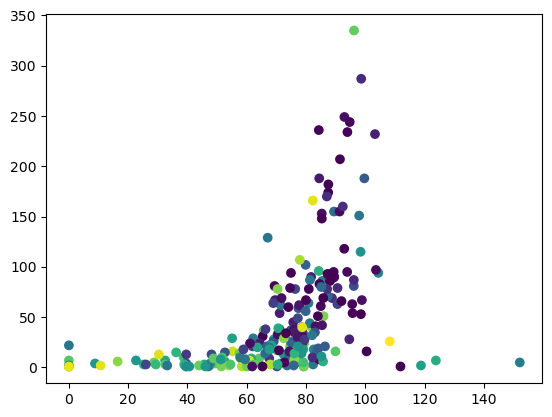

In [23]:
fig,ax = plt.subplots()
ax.scatter("careerPasserRating","games",c="pick",data=qbCareer)

In [24]:
qbs_by_draft_class = {}
for year in range (2000,2024):
    qbs_by_draft_class[year] = qbCareer[qbCareer["season_x"] == year]
qbs_by_draft_class

{2000:      season_x  round  pick team     gsis_id pfr_player_id      cfb_player_id  \
 17       2000      1    18  NYJ        None      PennCh01  chad-pennington-1   
 64       2000      3    65  SFO        None          None               None   
 74       2000      3    75  BAL  00-0019709      RedmCh00     chris-redman-1   
 162      2000      5   163  PIT        None      MartTe00       tee-martin-1   
 167      2000      6   168  NOR        None      BulgMa00      marc-bulger-1   
 182      2000      6   183  CLE        None      WynnSp00     spergon-wynn-1   
 198      2000      6   199  NWE  00-0019596      BradTo00        tom-brady-1   
 201      2000      6   202  WAS        None      HusaTo20       todd-husak-1   
 204      2000      6   205  SDG        None          None               None   
 211      2000      7   212  SFO        None      RattTi00       tim-rattay-1   
 213      2000      7   214  DEN        None      JackJa01  jarious-jackson-1   
 233      2000      7 

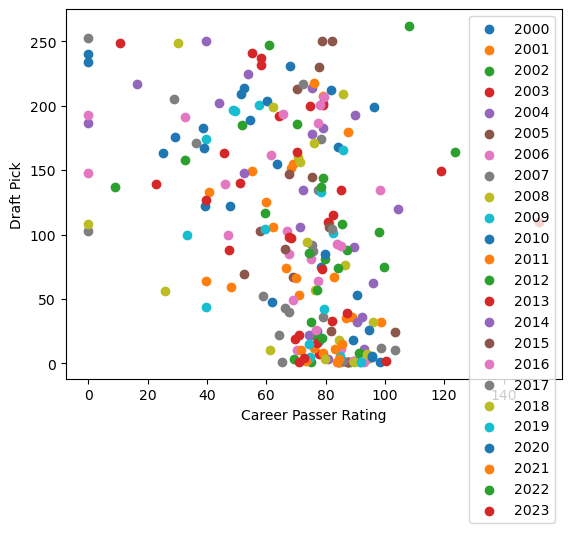

In [25]:
fig,ax = plt.subplots()
for year in qbs_by_draft_class.items():
  plt.scatter("careerPasserRating","pick",data=year[1], label=year[0])
  ax.legend()
  ax.set_xlabel("Career Passer Rating")
  ax.set_ylabel("Draft Pick")

In [26]:
def best_qb_available(year, pick,minPassAttempts=500):
    qb_class: pd.DataFrame = qbs_by_draft_class[year]
    qb_class = qb_class[qb_class["attempts"] >= minPassAttempts]
    qbs_available = qb_class[qb_class["pick"] >= pick]
    qbs_available = qbs_available.sort_values("careerPasserRating", ascending=False)
    try:
        return qbs_available.iloc[0]["pfr_player_name"]
    except:
        return None

In [27]:
print(best_qb_available(2005,251))

None


In [28]:
draft_picks_2005 = mergedData[mergedData["season_x"] == 2020]
qb_picks_2005 = draft_picks_2005[draft_picks_2005["position"]== "QB"]
for index,pick in qb_picks_2005.iterrows():
    print("Pick: ", pick["pick"],", Picked: ",pick["pfr_player_name"], ", BPA: ", best_qb_available(2020,pick["pick"],0))

Pick:  1 , Picked:  Joe Burrow , BPA:  Joe Burrow
Pick:  5 , Picked:  Tua Tagovailoa , BPA:  Tua Tagovailoa
Pick:  6 , Picked:  Justin Herbert , BPA:  Justin Herbert
Pick:  26 , Picked:  Jordan Love , BPA:  Jordan Love
Pick:  53 , Picked:  Jalen Hurts , BPA:  Jalen Hurts
Pick:  122 , Picked:  Jacob Eason , BPA:  Ben DiNucci
Pick:  125 , Picked:  James Morgan , BPA:  Ben DiNucci
Pick:  167 , Picked:  Jake Fromm , BPA:  Ben DiNucci
Pick:  189 , Picked:  Jake Luton , BPA:  Ben DiNucci
Pick:  224 , Picked:  Cole McDonald , BPA:  Ben DiNucci
Pick:  231 , Picked:  Ben DiNucci , BPA:  Ben DiNucci
Pick:  240 , Picked:  Tommy Stevens , BPA:  Tommy Stevens
Pick:  244 , Picked:  Nate Stanley , BPA:  None


In [29]:
percent_correct_by_year = {}
for year,item in qbs_by_draft_class.items():
    qbs_picked = 0
    corect_qbs_picked = 0
    item.sort_values("pick",ascending=True)
    for index,qb in item.iterrows():
        qbs_picked += 1
        if qb["pfr_player_name"] == best_qb_available(qb["season_x"],qb["pick"],0):
            corect_qbs_picked += 1
    percent_correct_by_year[year] = corect_qbs_picked/qbs_picked
    print(year, ": ", round(corect_qbs_picked/qbs_picked,2))
sum(percent_correct_by_year.values())/24

2000 :  0.33
2001 :  0.27
2002 :  0.13
2003 :  0.38
2004 :  0.29
2005 :  0.14
2006 :  0.46
2007 :  0.27
2008 :  0.15
2009 :  0.27
2010 :  0.38
2011 :  0.25
2012 :  0.27
2013 :  0.36
2014 :  0.21
2015 :  0.29
2016 :  0.13
2017 :  0.6
2018 :  0.38
2019 :  0.27
2020 :  0.54
2021 :  0.3
2022 :  0.11
2023 :  0.14


0.29066283661871894

In [74]:
team_info = {}

for year,item in qbs_by_draft_class.items():
    for index,qb in item.iterrows():
        if qb["team"] not in team_info.keys():
            team_info[qb["team"]] = {"qbs_picked":0,"correct_qbs_picked":0}
        team_info[qb["team"]]["qbs_picked"] +=1
        if qb["pfr_player_name"] == best_qb_available(qb["season_x"],qb["pick"],0):
            team_info[qb["team"]]["correct_qbs_picked"] +=1
for index,team in team_info.items():
    print(index, ": ",team["correct_qbs_picked"] / team["qbs_picked"])



NYJ :  0.14285714285714285
SFO :  0.5384615384615384
BAL :  0.36363636363636365
PIT :  0.4
NOR :  0.25
CLE :  0.09090909090909091
NWE :  0.23076923076923078
WAS :  0.25
SDG :  0.2857142857142857
DEN :  0.5
TAM :  0.25
ATL :  0.2857142857142857
DAL :  0.6666666666666666
OAK :  0.0
CAR :  0.1111111111111111
NYG :  0.25
DET :  0.125
PHI :  0.3
SEA :  0.2857142857142857
MIA :  0.125
HOU :  0.2
ARI :  0.4444444444444444
JAX :  0.0
GNB :  0.5555555555555556
STL :  0.42857142857142855
CIN :  0.3333333333333333
CHI :  0.125
BUF :  0.25
IND :  0.42857142857142855
KAN :  0.3333333333333333
TEN :  0.2222222222222222
MIN :  0.375
LAR :  0.0
LAC :  0.6666666666666666
LVR :  0.0


In [30]:
rbCareer = mergedData[mergedData["position"] == "RB"]
rbCareer

,season_x,round,pick,team,gsis_id,pfr_player_id,cfb_player_id,pfr_player_name,hof,position,...,receiving_first_downs,receiving_epa,receiving_2pt_conversions,racr,target_share,air_yards_share,wopr,special_teams_tds,fantasy_points,fantasy_points_ppr
4,2000,1,5,BAL,None,LewiJa00,jamal-lewis-2,Jamal Lewis,False,RB,...,73.0,60.572134,0.0,87.034524,12.131081,0.240647,6.732299,0.0,1640.70,1871.70
6,2000,1,7,ARI,00-0019641,JoneTh00,thomas-jones-1,Thomas Jones,False,RB,...,93.0,22.130676,0.0,-59.506067,16.599807,-1.133871,10.435513,0.0,1749.04,2069.04
10,2000,1,11,NYG,None,DaynRo00,ron-dayne-1,Ron Dayne,False,RB,...,10.0,-11.667638,0.0,-2.833333,2.774045,3.971168,5.102290,0.0,576.80,635.80
18,2000,1,19,SEA,None,AlexSh00,shaun-alexander-1,Shaun Alexander,False,RB,...,72.0,42.687871,0.0,20.708333,10.435236,-0.063256,2.461886,0.0,1842.10,2067.10
30,2000,1,31,STL,None,CaniTr00,trung-canidate-1,Trung Canidate,False,RB,...,13.0,-28.344154,0.0,0.000000,1.386754,0.000000,0.000000,0.0,177.20,209.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6302,2024,5,173,NYJ,None,DaviIs00,None,Isaiah Davis,False,RB,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.60,0.60
6310,2024,6,181,LAC,None,VidaKi00,kimani-vidal-1,Kimani Vidal,False,RB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6315,2024,6,186,ATL,None,McClJa05,jase-mcclellan-1,Jase McClellan,False,RB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6334,2024,6,205,HOU,None,JordJa00,jawhar-jordan-1,Jawhar Jordan,False,RB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


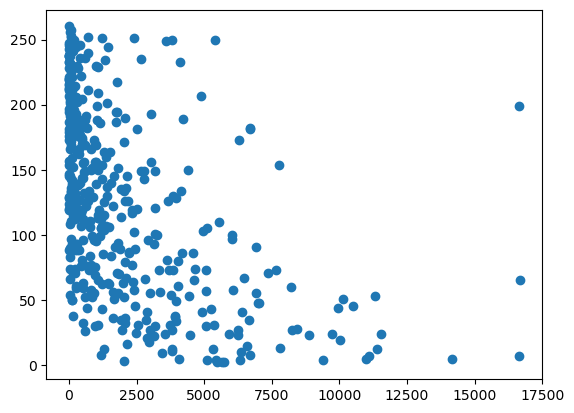

In [66]:
fig,ax = plt.subplots()
ax.scatter("rushing_yards","pick",data=rbCareer)

In [32]:
rbCareer.columns

Index(['season_x', 'round', 'pick', 'team', 'gsis_id', 'pfr_player_id',
       'cfb_player_id', 'pfr_player_name', 'hof', 'position', 'category',
       'side', 'college', 'age', 'to', 'allpro', 'probowls', 'seasons_started',
       'w_av', 'car_av', 'dr_av', 'games', 'pass_completions', 'pass_attempts',
       'pass_yards', 'pass_tds', 'pass_ints', 'rush_atts', 'rush_yards',
       'rush_tds', 'receptions_x', 'rec_yards', 'rec_tds', 'def_solo_tackles',
       'def_ints', 'def_sacks', 'player_display_name', 'season_y', 'week',
       'completions', 'attempts', 'passing_yards', 'passing_tds',
       'interceptions', 'sacks', 'sack_yards', 'sack_fumbles',
       'sack_fumbles_lost', 'passing_air_yards', 'passing_yards_after_catch',
       'passing_first_downs', 'passing_epa', 'passing_2pt_conversions', 'pacr',
       'dakota', 'carries', 'rushing_yards', 'rushing_tds', 'rushing_fumbles',
       'rushing_fumbles_lost', 'rushing_first_downs', 'rushing_epa',
       'rushing_2pt_conversions'

In [33]:
wrCareer = mergedData[mergedData["position"] == "WR"]
wrCareer

,season_x,round,pick,team,gsis_id,pfr_player_id,cfb_player_id,pfr_player_name,hof,position,...,receiving_first_downs,receiving_epa,receiving_2pt_conversions,racr,target_share,air_yards_share,wopr,special_teams_tds,fantasy_points,fantasy_points_ppr
3,2000,1,4,CIN,None,WarrPe00,peter-warrick-1,Peter Warrick,False,WR,...,153.0,89.298630,0.0,0.000000,15.834173,0.000000,0.000000,2.0,464.10,739.10
7,2000,1,8,PIT,00-0019642,BurrPl00,plaxico-burress-1,Plaxico Burress,False,WR,...,444.0,597.260278,2.0,70.129934,36.057671,22.646126,35.895016,0.0,1334.30,1933.30
9,2000,1,10,BAL,None,TaylTr01,travis-taylor-1,Travis Taylor,False,WR,...,199.0,200.303379,0.0,22.823080,19.220697,4.573114,7.187021,0.0,571.00,896.00
20,2000,1,21,KAN,None,MorrSy00,None,Sylvester Morris,False,WR,...,26.0,-8.554786,0.0,0.000000,2.816555,0.000000,0.000000,0.0,51.84,93.84
28,2000,1,29,JAX,None,SowaR.00,r-jay-soward-1,R. Jay Soward,False,WR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6345,2024,6,216,DAL,None,FlouRy00,None,Ryan Flournoy,False,WR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6354,2024,7,225,LAC,None,RiceBr00,brenden-rice-1,Brenden Rice,False,WR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6364,2024,7,235,DEN,None,VeleDe00,devaughn-vele-1,Devaughn Vele,False,WR,...,1.0,-0.597349,0.0,2.294118,0.190476,0.064394,0.330790,0.0,3.90,11.90
6370,2024,7,241,MIA,None,WashTa00,tahj-washington-1,Tahj Washington,False,WR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
def defineReceiverRating(targets,catches,receiving_yards,tds,fumbles): # computes the passer rating of a player
    try:
        a = ((catches / targets) - 0.5) * 6
        b = (receiving_yards / targets - 4) * 0.25
        c = (tds / targets) * 20
        d = 2 - ((fumbles / targets) * 25 )
        vals = [a,b,c,d]
        for index,x in enumerate(vals):
            if x > 2.375:
                vals[index] = 2.375
            elif x < 0:
                vals[index] = 0

        rating = sum(vals) * 100 / 6
        
        return rating

    except Exception as e:
        return 0
    
def receiverRatingByRow(row:pd.Series):
    rating = defineReceiverRating(row["targets"],row["receptions_y"],row["receiving_yards"],row["receiving_tds"],row["receiving_fumbles"])
    print(row["player_display_name"], rating)
    return round(rating,2)


In [56]:
wrCareer["receiver_rating"] = wrCareer.apply(receiverRatingByRow, axis=1)

Peter Warrick 69.31306306306307
Plaxico Burress 106.7124105011933
Travis Taylor 87.13182471264368
Sylvester Morris 27.976190476190478
nan nan
Dennis Northcutt 100.01640419947508
Todd Pinkston 79.91666666666667
Jerry Porter 131.9870009285051
Ron Dugans 51.415598290598275
Dez White 75.56620209059234
Chris Cole 33.33333333333332
Ron Dixon 60.752688172043015
Laveranues Coles 108.31876456876459
JaJuan Dawson 61.111111111111114
Darrell Jackson 111.31382466281309
Gari Scott 43.75
Danny Farmer 56.044600938967136
Trevor Gaylor 52.16942148760331
nan nan
Avion Black 43.26923076923077
Windrell Hayes 41.666666666666664
nan nan
Dante Hall 115.59622467771639
nan nan
Troy Walters 119.09722222222221
Frank Murphy 53.6764705882353
nan nan
James Williams 59.90566037735849
nan nan
nan nan
nan nan
Drew Haddad 102.08333333333333
Charles Lee 106.87751004016063
nan nan
nan nan
David Terrell 105.38302277432712
Koren Robinson 92.21411192214111
Rod Gardner 86.0240690281562
Santana Moss 101.21763754045308
Freddie 

/var/folders/5c/_dwtkx1d5j7835qsxngq7bxm0000gn/T/ipykernel_66951/226872162.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrCareer["receiver_rating"] = wrCareer.apply(receiverRatingByRow, axis=1)


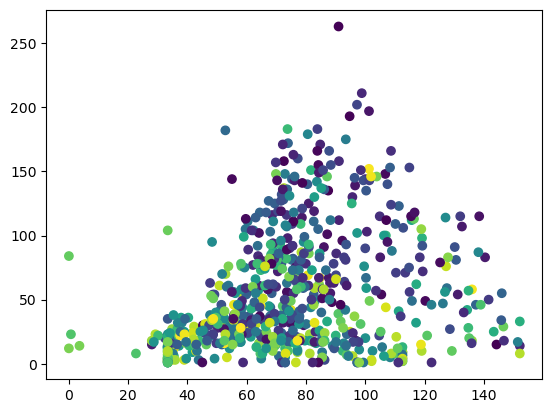

In [57]:
fig,ax = plt.subplots()
ax.scatter("receiver_rating","games",c="pick",data=wrCareer)